--- 1. Loading Data ---
✅ Files loaded successfully.
--- 2. Cleaning Data ---
✅ Data ready! Total Songs: 8775
--- 3. Visualizing Trends ---


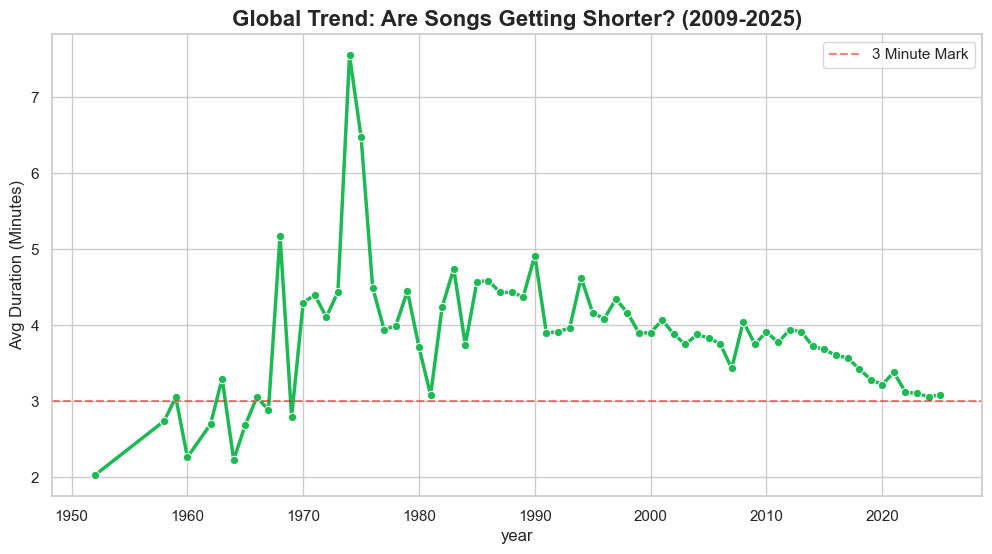

/var/folders/bj/grvlj1w17zj2fjbgd6l53f1h0000gn/T/ipykernel_51471/944802580.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='count', y='genre', palette='viridis')


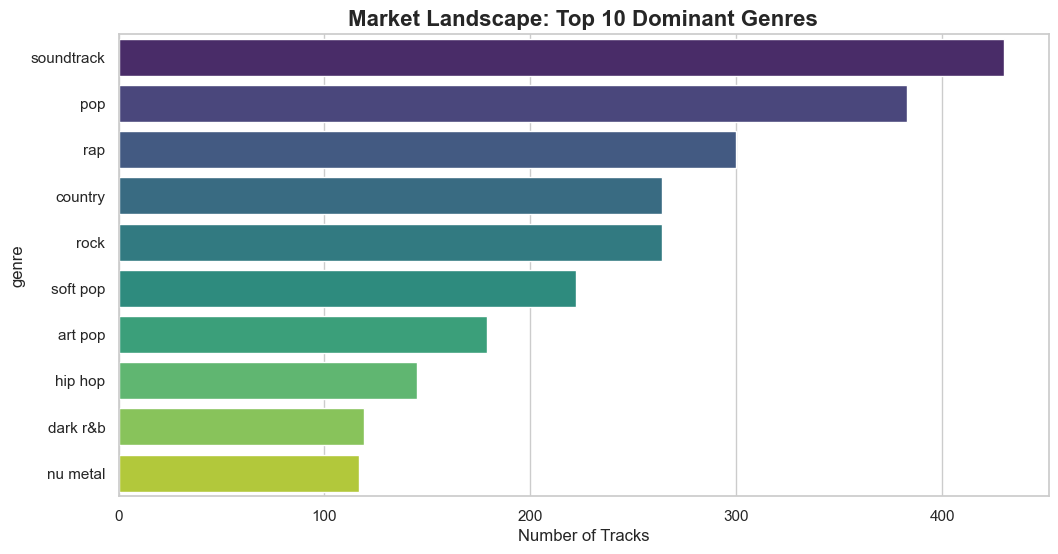

--- 4. Machine Learning: What drives popularity? ---
Model Accuracy (R² Score): 0.06


/var/folders/bj/grvlj1w17zj2fjbgd6l53f1h0000gn/T/ipykernel_51471/944802580.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette='magma')


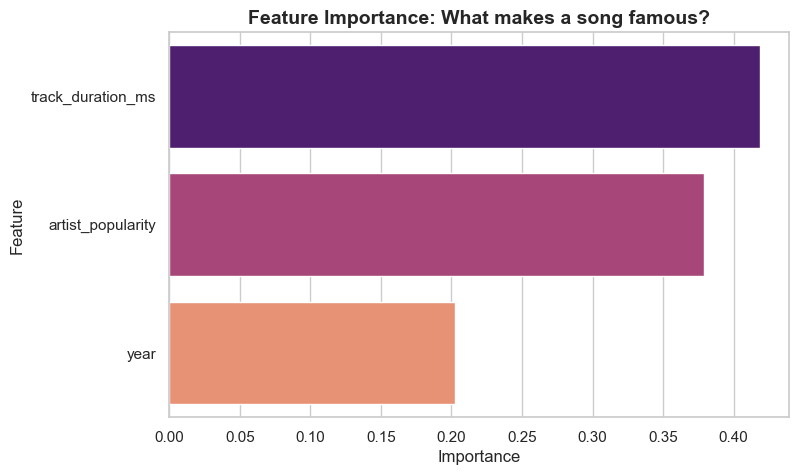


🎉 PROJECT COMPLETE!


In [3]:
# =============================================================================
# PROJECT: Global Music Trends & Success Predictors (2009-2025)
# AUTHOR: [Your Name]
# =============================================================================

# 1. SETUP & IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set style for professional charts
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.mode.chained_assignment = None  # Suppress generic warnings

# -----------------------------------------------------------------------------
# STEP 1: DATA LOADING & MERGING
# -----------------------------------------------------------------------------
print("--- 1. Loading Data ---")
try:
    df_final = pd.read_csv('track_data_final.csv')
    df_clean = pd.read_csv('spotify_data clean.csv')
    print("✅ Files loaded successfully.")
except FileNotFoundError:
    print("❌ Error: Files not found. Please upload dataset.")

# Standardize Duration (Minutes -> Milliseconds)
if 'track_duration_min' in df_clean.columns:
    df_clean['track_duration_ms'] = df_clean['track_duration_min'] * 60 * 1000
    df_clean = df_clean.drop(columns=['track_duration_min'])

# Merge Datasets
df_merged = pd.concat([df_final, df_clean], ignore_index=True)

# -----------------------------------------------------------------------------
# STEP 2: DATA CLEANING
# -----------------------------------------------------------------------------
print("--- 2. Cleaning Data ---")

# Fix Dates
df_merged['album_release_date'] = pd.to_datetime(df_merged['album_release_date'], errors='coerce')
df_merged = df_merged.dropna(subset=['album_release_date'])
df_merged['year'] = df_merged['album_release_date'].dt.year

# Remove Duplicates
df_merged = df_merged.drop_duplicates(subset=['track_id'])

# Fix Genres (String "['pop']" -> List ['pop'])
def clean_genre_format(text):
    try:
        if pd.isna(text): return []
        return ast.literal_eval(text)
    except:
        return []

df_merged['genre_list'] = df_merged['artist_genres'].apply(clean_genre_format)

print(f"✅ Data ready! Total Songs: {len(df_merged)}")

# -----------------------------------------------------------------------------
# STEP 3: EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------------------------------------------------------
print("--- 3. Visualizing Trends ---")

# --- CHART 1: The "TikTok Effect" (Duration Trend) ---
duration_trend = df_merged.groupby('year')['track_duration_ms'].mean().reset_index()
duration_trend['duration_min'] = duration_trend['track_duration_ms'] / 60000

plt.figure(figsize=(12, 6))
sns.lineplot(data=duration_trend, x='year', y='duration_min', marker='o', linewidth=2.5, color='#1DB954')
plt.axhline(y=3.0, color='red', linestyle='--', alpha=0.5, label='3 Minute Mark')
plt.title('Global Trend: Are Songs Getting Shorter? (2009-2025)', fontsize=16, fontweight='bold')
plt.ylabel('Avg Duration (Minutes)')
plt.legend()
plt.show()

# --- CHART 2: Genre Dominance (Top 10) ---
df_exploded = df_merged.explode('genre_list')
top_genres = df_exploded['genre_list'].value_counts().head(10).reset_index()
top_genres.columns = ['genre', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x='count', y='genre', palette='viridis')
plt.title('Market Landscape: Top 10 Dominant Genres', fontsize=16, fontweight='bold')
plt.xlabel('Number of Tracks')
plt.show()

# -----------------------------------------------------------------------------
# STEP 4: MACHINE LEARNING (PREDICTING POPULARITY)
# -----------------------------------------------------------------------------
print("--- 4. Machine Learning: What drives popularity? ---")

# Prepare Data for ML
# We will use: Duration, Artist Reputation, and Year to predict Song Popularity
features = ['track_duration_ms', 'artist_popularity', 'year']
target = 'track_popularity'

# Drop rows with missing values
df_ml = df_merged.dropna(subset=features + [target])

X = df_ml[features]
y = df_ml[target]

# Split Train/Test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize & Train Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print(f"Model Accuracy (R² Score): {r2:.2f}")

# Feature Importance Visualization
importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=importance, x='Importance', y='Feature', palette='magma')
plt.title('Feature Importance: What makes a song famous?', fontsize=14, fontweight='bold')
plt.show()

print("\n🎉 PROJECT COMPLETE!")